**Метаинформация**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('steam_reviews.csv')

In [10]:
df.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

In [4]:
df['language'].value_counts() # подтвердим, что большинство отзывов на английском языке

english       9635437
schinese      3764967
russian       2348900
brazilian      837524
spanish        813320
german         752596
turkish        635868
koreana        613632
french         541751
polish         495529
tchinese       218203
czech          133980
italian        133307
thai           127503
japanese        81754
portuguese      81386
swedish         80226
dutch           77555
hungarian       71001
latam           70103
danish          55915
finnish         54712
norwegian       36797
romanian        32730
ukrainian       21169
greek           14472
bulgarian       10454
vietnamese       6580
Name: language, dtype: int64

**Настройка данных**

In [18]:
eng_reviews = df[df["language"] == 'english']

In [12]:
eng_reviews.info(memory_usage = 'deep') # посмотрим, подходит ли датафрейм по размерам под ТЗ

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9635437 entries, 3 to 21747369
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned    

In [1]:
# хочу выкинуть ещё часть "ненужной" информации и посмотреть подходит ли датафрейм под ТЗ

In [19]:
eng_reviews = eng_reviews.drop(["Unnamed: 0", "app_id", "review_id", "language", "timestamp_created", "timestamp_updated",
                                "comment_count", "steam_purchase", "received_for_free", "written_during_early_access",
                               "author.steamid", "author.num_games_owned", "author.num_reviews", "author.playtime_forever",
                               "author.playtime_last_two_weeks", "author.playtime_at_review", "author.last_played"], axis = 1)

In [6]:
eng_reviews.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9635437 entries, 3 to 21747369
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   app_name             object 
 1   review               object 
 2   recommended          bool   
 3   votes_helpful        int64  
 4   votes_funny          int64  
 5   weighted_vote_score  float64
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 3.6 GB


In [ ]:
# логично что всё ещё подходит потому что текст отзывов больше всего места будет занимать.
# (можно ещё название игр в принципе выкинуть)

In [20]:
eng_reviews.head()

,app_name,review,recommended,votes_helpful,votes_funny,weighted_vote_score
3,The Witcher 3: Wild Hunt,"One of the best RPG's of all time, worthy of a...",True,0,0,0.0
5,The Witcher 3: Wild Hunt,"good story, good graphics. lots to do.",True,0,0,0.0
6,The Witcher 3: Wild Hunt,"dis gud,",True,0,0,0.0
18,The Witcher 3: Wild Hunt,favorite game of all time cant wait for the Ne...,True,0,0,0.0
20,The Witcher 3: Wild Hunt,Why wouldn't you get this,True,0,0,0.0


C:\Users\ivevv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='recommended', ylabel='count'>

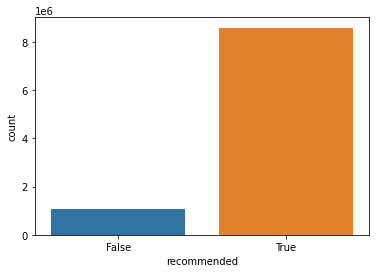

In [17]:
# ~ визуализация ~ посмотрим соотношение положительных отзывов к отрицательным

import seaborn as sns

sns.countplot((eng_reviews)['recommended'])

In [21]:
eng_reviews.to_csv(r'./eng_reviews_raw.csv', index = False)

In [28]:
eng_reviews = pd.read_csv('eng_reviews_raw.csv') # шорткат

In [ ]:
# появилась мысль отсортировать дф по votes_helpful и обучить модель по самым полезным отзывам вручную
# вместо автоматического разделения train_test_split но не знаю насколько она хорошая
# также можно использовать параметр weighted_vote_score (Score based on number of helpful votes)
# ещё можно при обучении учесть что положительных отзывов во много раз больше отрицательных и как-то это сбалансировать вручную
# можно обучить четыре модели разными способами и сравнить для иллюзии бурной деятельности

# пока просто почищу текст

In [11]:
import re

def cleanup(text):
    text = str(text).lower()
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub('\W+',' ', text)
    return text

# не все юзеры расставляют апострофы при письме (cant вместо can't) но это будет сложно учесть
# думаю нет смысла тратить на это вычислительные ресурсы

In [12]:
eng_reviews['review'] = eng_reviews['review'].apply(cleanup)
eng_reviews.head()

,app_name,review,recommended,votes_helpful,votes_funny,weighted_vote_score
0,The Witcher 3: Wild Hunt,one of the best rpg of all time worthy of any ...,True,0,0,0.0
1,The Witcher 3: Wild Hunt,good story good graphics lots to do,True,0,0,0.0
2,The Witcher 3: Wild Hunt,dis gud,True,0,0,0.0
3,The Witcher 3: Wild Hunt,favorite game of all time cant wait for the ne...,True,0,0,0.0
4,The Witcher 3: Wild Hunt,why would not you get this,True,0,0,0.0


In [32]:
eng_reviews.to_csv(r'./eng_reviews.csv', index = False) # пока выгружу как есть

In [3]:
eng_reviews = pd.read_csv('eng_reviews.csv')

In [ ]:
# согласно
# https://towardsdatascience.com/sentiment-classification-with-logistic-regression-analyzing-yelp-reviews-3981678c3b44#c3b8
# стемминг и опущение служебных слов уменьшают словарь (=экономят вычислительные ресурсы)
# но уменьшают точность модели
# также в списке служебных слов NTLK есть not которое всё-таки несет смысловую нагрузку и которое не стоит выкидывать из отзыва
# можно отзывы постеммить но оставить служебные слова
# плюс TF-IDF Vectorizer и так учитывает наличие служебных слов

In [ ]:
# пока построю модель с train_test_split и TF-IDF Vectorizer на имеющихся данных

In [4]:
X = eng_reviews['review'] # что классифицируем

In [5]:
Y = eng_reviews['recommended'] # по чему классифицируем

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
vec.fit(X_train) # во всех двух источниках на которые я смотрю векторайзер применяют только к X_train и я не понимаю почему
                 # не ко всему X. есть идеи?

TfidfVectorizer()

In [15]:
x_train_vec = vec.transform(X_train)
x_test_vec = vec.transform(X_test)

In [16]:
x_train_vec[1]

<1x939840 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [18]:
vec.vocabulary_['good']

318721

In [38]:
from sklearn.linear_model import LogisticRegression

model0 = LogisticRegression()
model0.fit(x_train_vec, y_train) # в лоб не получается

C:\Users\ivevv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
model1 = LogisticRegression(solver = 'sag') # с оптимайзером для больших датасетов
model1.fit(x_train_vec, y_train)

LogisticRegression(solver='sag')

In [41]:
model1.score(x_test_vec, y_test) # mean accuracy on the given test data and labels.

0.939880275316955

In [42]:
model1.score(x_train_vec, y_train)

0.9412836990839617

In [ ]:
# а в первом докладе обещали F-score

In [44]:
# для этого нужно сделать предсказания
from sklearn import metrics

y_pred = model1.predict(x_test_vec)
metrics.f1_score(y_test, y_pred)

0.966729257668674

In [ ]:
# скор получается довольно высокий
# теперь можно позаниматься визуализацией полученных результатов и/или сравнить разные модели о которых я писала выше